In [ ]:
from math import sqrt
from scipy.stats import t

def paired_t_test(diff):
    n = len(diff)
    mean = diff.mean()
    std = diff.std()

    se = std / sqrt(n)
    df = n - 1

    t_ratio = mean / se

    print 't ratio (assuming mean is zero): %.8lf' % t_ratio

    rv = t(df)
    p_value = (1.0 - rv.cdf(abs(t_ratio))) * 2

    print 'two-sided p value: %.8lf' % p_value

    # t-stat = (mean - pop_mean) / se
    # pop_mean = mean - t-stat * se
    pop_mean = lambda t_stat: mean - t_stat * se

    hi, lo = rv.ppf([0.025, 0.975])
    print '95%% confidence interval: %.4lf ~ %.4lf' % (pop_mean(lo), pop_mean(hi))

## One sample T-test

In [4]:
from scipy import stats
import numpy as np
np.random.seed(12345678)


In [5]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)

In [10]:
max(rvs1),min(rvs1),len(rvs1)

(31.075484068960758, -29.164601591855572, 500)

In [12]:
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)

In [13]:
max(rvs2),min(rvs2),len(rvs2)

(35.974285223390183, -26.031236611620496, 500)

In [14]:
stats.ttest_ind(rvs1,rvs2)

(0.26833823296238857, 0.78849443369565098)

In [15]:
%matplotlib inline


In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [23]:
np.random.seed(6)


population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


In [31]:
a,b=stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

print "t : ",a, "and p-value : ",b

t :  -2.57427148837 and p-value :  0.0131186854251


In [53]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.0095752344892088

In [52]:
stats.t.pdf(x=0.013,  
            df=49)  # Degrees of freedom

0.39687796266590969

In [54]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*


'''Notice this value is the same as the p-value 
listed in the original t-test output. 
A p-value of 0.01311 means we'd expect to see data 
as extreme as our sample due to chance about 1.3% 
of the time if the null hypothesis was true.'''

0.013121066545690117

In [57]:
stats.t.cdf(x= 10,      # T-test statistic
               df= 49)    # Mupltiply by two for two tailed test*

0.9999999999998993

In [75]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size
print 'stdev:', sigma
print 'minnesota avg age:',minnesota_ages.mean()
'''stat.t.interval(alpha, df, loc, scale) : 
Endpoints of the range that contains alpha percent of the distribution'''

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate



stdev: 1.43827952777
minnesota avg age: 39.26


(36.369669080722176, 42.15033091927782)

In [84]:
'''With a higher confidence level, 
we construct a wider confidence interval 
and increase the chances that it captures to true mean, 
thus making it less likely that we'll reject the null hypothesis. 
In this case, the p-value of 0.013 is greater than our significance levelof 0.01 
and we fail to reject the null hypothesis.'''


stats.t.interval(alpha = 1-0.012,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)             

(35.507179730092567, 43.012820269907429)

## Two-Sample T-test

In [95]:
import random
random.seed( 10 )
print "Random number with seed 10 : ", random.random() #will generate a random number 
#if you want to use the same random number once again in your program
random.seed( 10 )
print "2nd random number with seed 10 : ",random.random()

 Random number with seed 10 :  0.57140259469
2nd random number with seed 10 :  0.57140259469


In [93]:
random.random()

0.20609823213950174

In [115]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=0.001, size=100)

import pandas as pd 
weight_df= pd.DataFrame({"weight before":before, 
                        "weight after":after,
                       "weight change":after-before})
weight_df.describe()

,weight after,weight before,weight change
count,100.000000,100.000000,100.000000
mean,250.366171,250.345546,0.020625
std,28.422183,28.132539,4.783696
min,167.164930,170.400443,-10.244286
25%,230.399236,230.421042,-2.795211
50%,252.385089,250.830805,-0.162463
75%,270.178258,270.637145,2.989673
max,317.971357,314.700233,11.010282


In [116]:
a,b=stats.ttest_rel(a=before,
               b=after)

print "t : ",a, "and p-value : ",b

t :  -0.0431151867029 and p-value :  0.96569655371


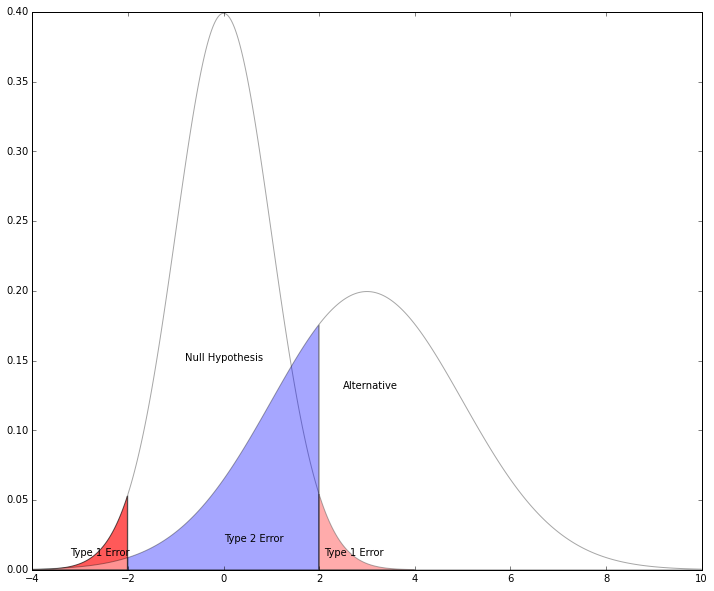

In [122]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.65)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In [129]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value, about -2
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value, about 2



# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
print "type II error is :", high-low

type II error is : 0.294956061112
